# M4 - W1 Assignment: Visualising the Right Way!

Student: Loai Siwas

1. Create a plot using Matplotlib

    1. Create a numpy array x with 1000 values ranging from -10 to 10. Create another numpy array y with 1000 values ranging from -10 to 10.
    1. Define a function z_func that takes in two arguments x and y and returns a numpy array of the same shape as x and y. The function should use the equation z = sin(sqrt(x^2 + y^2)) / sqrt(x^2 + y^2). Use x and y as inputs to the z_func function to create a numpy array z.
    1. Use matplotlib to create a 2D scatter plot of x and y. Use the scatter() function to create the plot, and set the c parameter to z to color the markers based on the value of z. Use the cmap parameter to specify the colormap to use, and set it to 'coolwarm'. Add a colorbar to the plot using the colorbar() function. Set the title of the plot to "Advanced Scatter Plot", and set the x and y axis labels to "X-axis" and "Y-axis", respectively.
    1. Save the plot as a PNG image named "advanced_scatter_plot.png" with a resolution of 300 DPI.
    
    
2. We take data visualisation seriously.  With every single one, we as data scientists, try our best to visualise the numbers accurately and in a way that best supports our goals. But sometimes we get it wrong. We can do better in future if we learn from our mistakes . Now, take a look at the two visualisations below about public opinion on Britain's decision to leave the EU. The one on the left represents a not-so-good visualisation while the right one does a better job.

    Now your task is the following: 
    1. First, explain thoroughly which one you think is better; the left or the right. And why!  
    1. Reproduce both of them using Matplotlib. Do your best making them the exact copies.  
    1. Submit your visualisations including the explanation in step 1 as Jupyter notebook, and also upload it to GitHub!

    The dataset: brexit.csv  Download brexit.csv(The data is not completely clean. You need to remove the first couple of rows.)


---

---

## PART 1: Create a plot using Matplotlib

In [1]:
# Importing necessary packages.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#### PART 1.1: Create a numpy array x with 1000 values ranging from -10 to 10. Create another numpy array y with 1000 values ranging from -10 to 10.

In [3]:
# Create numpy arrays x and y
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

In [4]:
x.shape

(1000,)

In [5]:
y.shape

(1000,)

#### PART 1.2: Define a function z_func that takes in two arguments x and y and returns a numpy array of the same shape as x and y. The function should use the equation z = sin(sqrt(x^2 + y^2)) / sqrt(x^2 + y^2). Use x and y as inputs to the z_func function to create a numpy array z.

In [6]:
# Define the z_func function
def z_func(x, y):
    r = np.sqrt(x**2 + y**2)
    z = np.sin(r) / r
    return z

In [7]:
# Create numpy array z using x and y as inputs to z_func
z = z_func(x, y)

In [8]:
z.shape

(1000,)

#### PART 1.3: Use matplotlib to create a 2D scatter plot of x and y. Use the scatter() function to create the plot, and set the c parameter to z to color the markers based on the value of z. Use the cmap parameter to specify the colormap to use, and set it to 'coolwarm'. Add a colorbar to the plot using the colorbar() function. Set the title of the plot to "Advanced Scatter Plot", and set the x and y axis labels to "X-axis" and "Y-axis", respectively.

#### PART 1.4: Save the plot as a PNG image named "advanced_scatter_plot.png" with a resolution of 300 DPI.

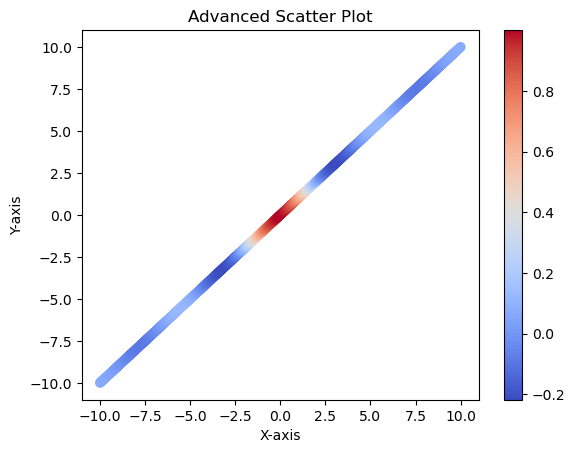

In [9]:
# Create a scatter plot of x and y with markers colored by z
plt.scatter(x, y, c=z, cmap='coolwarm')

# Add a colorbar to the plot
plt.colorbar()

# Set the title and axis labels
plt.title("Advanced Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")


# Save the plot as a PNG image
plt.savefig("advanced_scatter_plot.png", dpi=300)

---

## PART 2:

#### PART 2.1: First, explain thoroughly which one you think is better; the left or the right. And why!  

In my opinion, the graph on the right is superior because it displays the trend by plotting individual polls with a smoothed curve, unlike the second one which simply connects the actual values of each individual poll.

It's worth mentioning that the chart has a broken scale which causes the data to appear more spread out than it actually is. However, in the updated version of the chart, there's added space between the beginning of the scale and the smallest data point.

#### PART 2.2: Reproduce both of them using Matplotlib. Do your best making them the exact copies.  

##### Importing the cleaning the data the Priginal chart

In [10]:
# Importing necessary packages.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

%matplotlib inline

In [11]:
# Importing the "brexit.csv" dataset using Pandas, making the 4th rwo as header, changing the Date column type to pandas datetime, and making it as index
df = pd.read_csv("brexit.csv", header=3, parse_dates=["Date"], index_col="Date")

In [12]:
df.head()

,% responding right,% responding wrong
Date,,
2016-02-08,46,42
2016-09-08,45,44
2016-08-17,46,43
2016-08-23,45,43
2016-08-31,47,44


In [13]:
df.sort_index(inplace=True)
df.head()

,% responding right,% responding wrong
Date,,
2016-02-08,46,42
2016-05-12,44,42
2016-08-17,46,43
2016-08-23,45,43
2016-08-31,47,44


##### Generating the Original chart

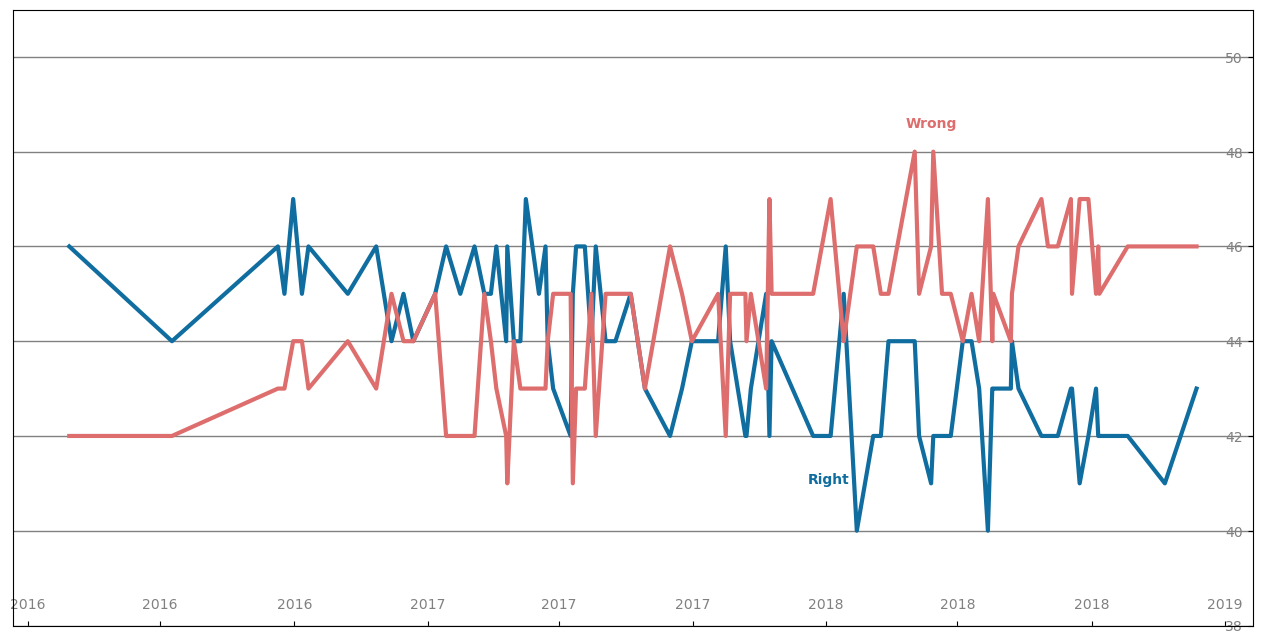

In [15]:
# ploting the two columns as 2 lines
fig, ax = plt.subplots()

ax.plot(df.index, df['% responding right'], color='#106da0', linestyle='-', linewidth=3)
ax.plot(df.index, df['% responding wrong'], color='#dd6e6d', linestyle='-', linewidth=3)

# add horizontal grid lines to the chart
ax.grid(axis='y', color='gray', linestyle='-', linewidth=1)

# move the y-axis ticks and labels to the inside of the figure
ax.tick_params(axis='y', direction='in', labelcolor='gray', pad=-20)
ax.yaxis.tick_right()

# adjust the x-axis ticks
ax.tick_params(axis='x', direction='in', labelcolor='gray', pad=-20)

# set the x-axis tick locator and formatter
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# set the limits of the right y-axis to extend its value
ax.set_ylim([38, 51])

# add an annotation
ax.annotate("Right", xy=(pd.Timestamp('2017-12-15'), 40), xytext=(pd.Timestamp('2017-12-15'), 41), fontweight='bold', color='#106da0')
ax.annotate("Wrong", xy=(pd.Timestamp('2018-03-15'), 48.5), xytext=(pd.Timestamp('2018-03-15'), 48.5), fontweight='bold', color='#dd6e6d')


# Changing the output size
plt.rc('figure', figsize=(16, 8))

plt.show()

##### Generating the Better chart

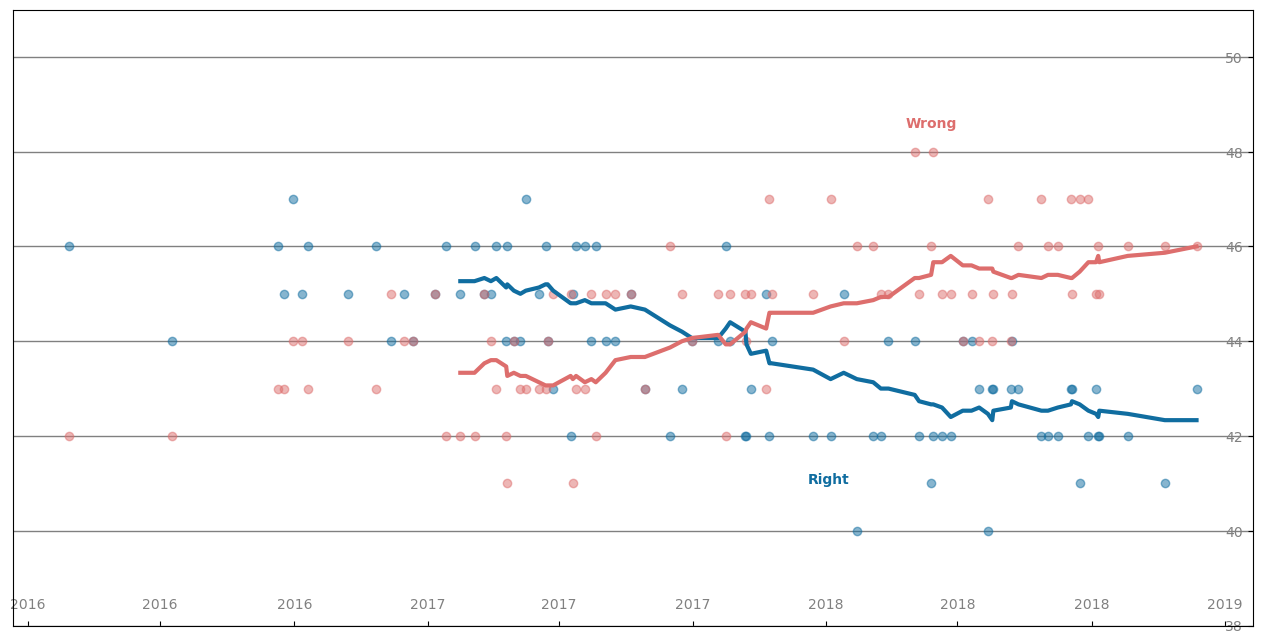

In [16]:
# ploting the two columns as 2 lines
fig, ax = plt.subplots()

### ploting the points:

ax.plot(df.index, df['% responding right'], color='#106da0', linestyle='None', marker="o", alpha=0.5)
ax.plot(df.index, df['% responding wrong'], color='#dd6e6d', linestyle='None', marker="o", alpha=0.5)

### ploting the line

# Calculate rolling mean with a window size of 3 for '% responding right'
right_rolling_mean = df['% responding right'].rolling(window=15).mean()

# Calculate rolling mean with a window size of 3 for '% responding right'
wrong_rolling_mean = df['% responding wrong'].rolling(window=15).mean()

# Plot the data and rolling mean

ax.plot(df.index, right_rolling_mean, color='#106da0', linestyle='-', linewidth=3)
ax.plot(df.index, wrong_rolling_mean, color='#dd6e6d', linestyle='-', linewidth=3)


## Formating the rest of the graph

# add horizontal grid lines to the chart
ax.grid(axis='y', color='gray', linestyle='-', linewidth=1)

# move the y-axis ticks and labels to the inside of the figure
ax.tick_params(axis='y', direction='in', labelcolor='gray', pad=-20)
ax.yaxis.tick_right()

# adjust the x-axis ticks
ax.tick_params(axis='x', direction='in', labelcolor='gray', pad=-20)

# set the x-axis tick locator and formatter
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

# set the limits of the right y-axis to extend its value
ax.set_ylim([38, 51])

# add an annotation
ax.annotate("Right", xy=(pd.Timestamp('2017-12-15'), 40), xytext=(pd.Timestamp('2017-12-15'), 41), fontweight='bold', color='#106da0')
ax.annotate("Wrong", xy=(pd.Timestamp('2018-03-15'), 48.5), xytext=(pd.Timestamp('2018-03-15'), 48.5), fontweight='bold', color='#dd6e6d')


# Changing the output size
plt.rc('figure', figsize=(16, 8))

plt.show()

In the above chart, we find that there is a scatter chart according to what is required, and also a line chart above it, but of course it looks different since I applied the line chart on the same data. I think it is the required result in terms of the code to display the chart, except that I encountered a problem in the method calculation process, If you can solve the slop equation, the code will generate the required chart

---

# End of Assignment

Student Name: Loai Siwas